In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [33]:
root = 'df_ARG.csv'

df_ARG = pd.read_csv(root, index_col=0, parse_dates=True, )
df_ARG.head()

,investment
year,
1993-01-01,122415.35
1994-01-01,581152.83
1995-01-01,229211.55
1996-01-01,1179473.44
1997-01-01,2547275.12


In [34]:
df_ARG.dtypes

investment    float64
dtype: object

Text(0.5, 1.0, 'Inversión total ARGENTINA')

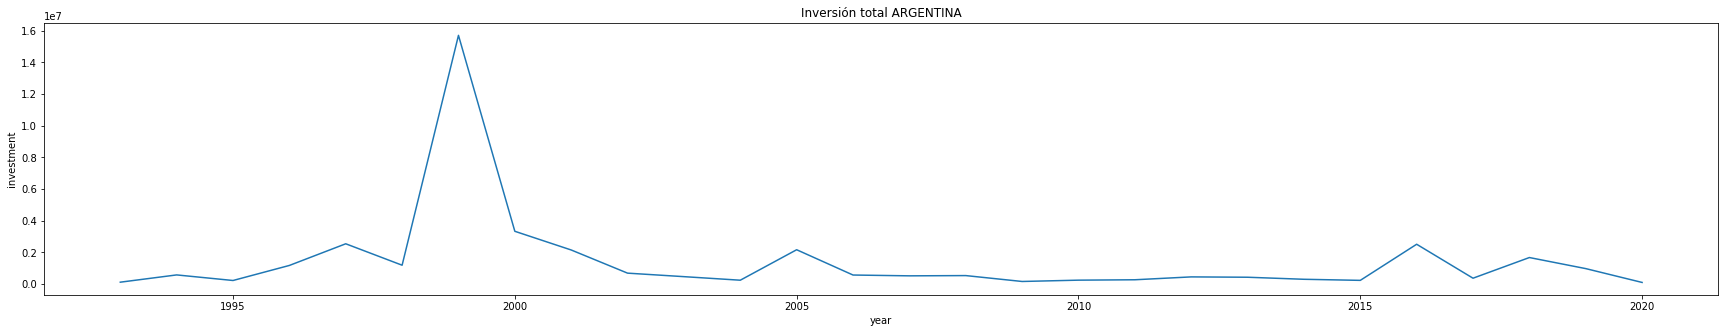

In [27]:
plt.figure(figsize=(30,5))
sns.lineplot(data=df_ARG, x='year', y='investment')
plt.title('Inversión total ARGENTINA')

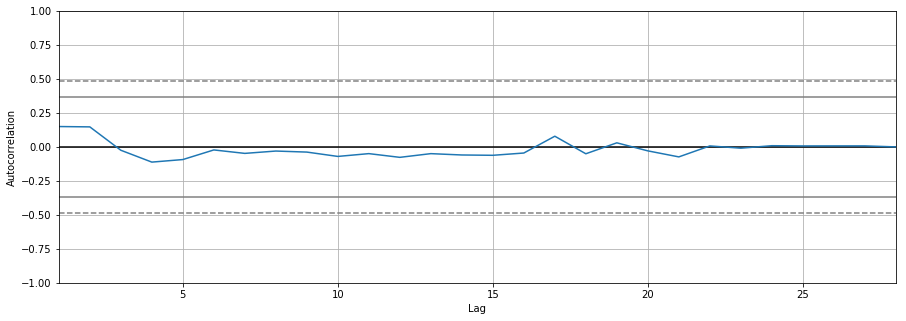

In [35]:
plt.figure(figsize=(15,5))

autocorrelation_plot(df_ARG)
plt.show()

In [50]:
df_ARG.index = df_ARG.index.to_period('Y')


AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [51]:
df_ARG.head()

,investment
year,
1993,122415.35
1994,581152.83
1995,229211.55
1996,1179473.44
1997,2547275.12


In [52]:
x = df_ARG

arima_model = ARIMA(x, order=(5,0,0))


In [53]:
model_fit = arima_model.fit() 

In [54]:
print(model_fit.sumary())

AttributeError: 'ARMAResults' object has no attribute 'sumary'

In [54]:
import statsmodels
statsmodels.__version__

'0.9.0'

In [ ]:
! conda update statsmodels -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.8
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/dsc/anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.4.13  |       h06a4308_1         120 KB
    mkl-2020.2                 |              256       213.9 MB
    mkl-service-2.3.0          |   py37he8ac12f_0          56 KB
    numpy-1.19.2               |   py37h54aff64_0          21 KB
    numpy-base-1.19.2          |   py37hfa32c7d_0         5.2 MB
    openssl-1.1.1k             |       h27cfd23_0         3.8 MB
    statsmodels-0.12.2         |   py37h27cfd23_0        11.0 MB
    ------------------------------------------------------------
                 

In [60]:
import statsmodels
statsmodels.__version__

'0.9.0'

In [55]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

NameError: name 'DataFrame' is not defined

In [ ]:
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
print(residuals.describe())

In [ ]:
# split into train and test sets
X = df_ARG.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()